___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [1]:
%run ./02-exploring-the-relationship-between-gender-and-policing.ipynb

C:\Users\CASPER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


object
bool
Citation            0.973416
Warning             0.012968
Arrest Driver       0.007410
N/D                 0.003612
Arrest Passenger    0.002316
No Action           0.000278
Name: stop_outcome, dtype: float64
------------------
Citation            0.957298
Arrest Driver       0.026230
Warning             0.010666
N/D                 0.003397
Arrest Passenger    0.002015
No Action           0.000395
Name: stop_outcome, dtype: float64
bool
bool


In [2]:
%matplotlib inline

In [3]:
ri.is_arrested.mean()

0.05182253697146428

In [4]:
ri.index.hour # it takes the hour number of the clock. If it is 13:00:30, it gets 13.

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 22, 23, 23],
           dtype='int64', name='stop_datetime', length=48010)

In [5]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

In [6]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [7]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

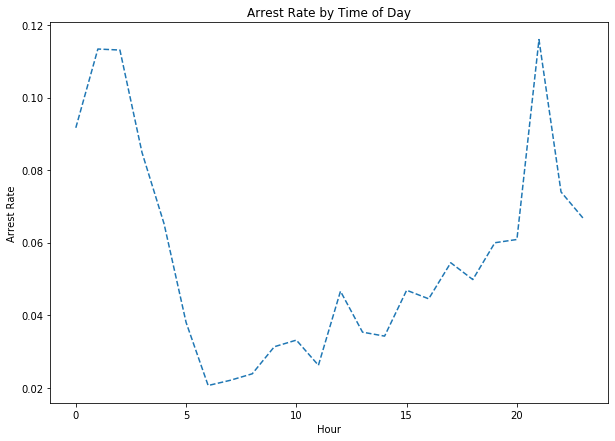

In [9]:
hourly_arrest_rate.plot(ls="--", figsize=(10,7))
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

In [10]:
# The rate of arrests increased during the night hours and decreased during the daytime.

***

## Plotting drug-related stops

In [11]:
ri.drugs_related_stop.resample("A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [12]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

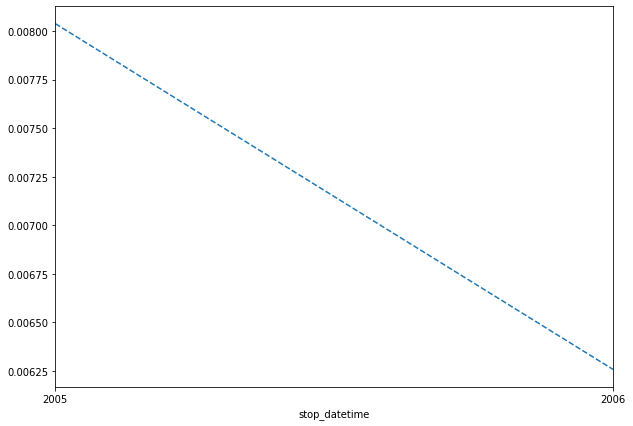

In [13]:
annual_drug_rate.plot(ls="dashed", figsize=(10,7))
plt.show()

## Comparing drug and search rates (to be deleted)

In [14]:
annual_search_rate = ri.search_conducted.resample("A").mean()

In [15]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = "columns")

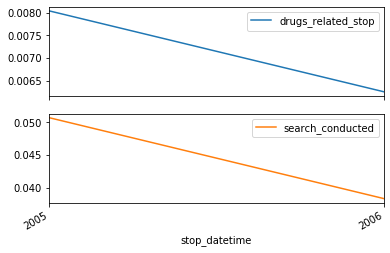

In [16]:
annual.plot(subplots = True)
plt.show()

In [17]:
# As the rate of vehicle search conducted decreased, the rate of drug-related stops decreased fell simultaneously.

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [18]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [19]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [20]:
all_zones.loc["Zone K1" : "Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


In [21]:
k_zones = all_zones.loc["Zone K1" : "Zone K3"]

## Plotting violations by district

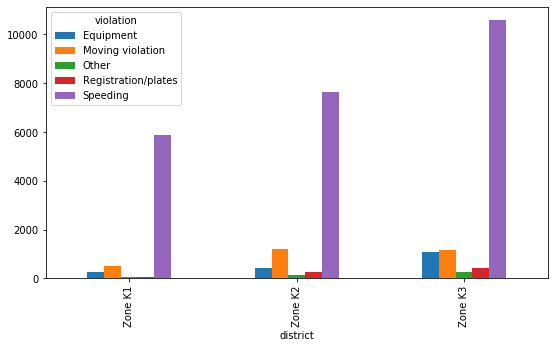

In [22]:
k_zones.plot.bar(figsize=(9,5))
plt.show()

In [23]:
# Zone K3 detected too many violations than others.However, Zone K1 detected very few violations.
# The reason for this may also be related to the unsafe area.
# And the most common violations were speeding.

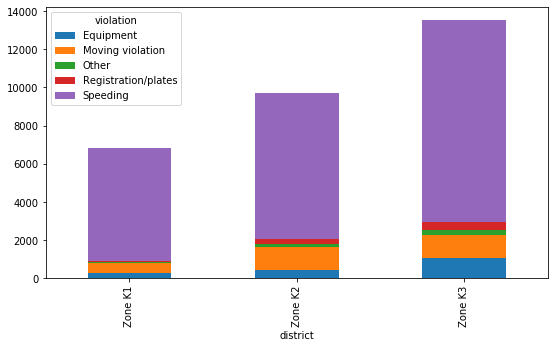

In [24]:
k_zones.plot.bar(stacked = True, figsize=(9,5))
plt.show()

In [25]:
# While the other violations were the least visible in the previous one,
# equipment violations were the least committed in this drawing.

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [26]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [27]:
mapping = {"0-15 Min" : 8, "16-30 Min" : 23, "30+ Min" : 45}

In [28]:
ri["stop_minutes"] = ri.stop_duration.map(mapping)

In [29]:
ri.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

## Plotting stop length

In [30]:
ri.groupby("violation_raw").stop_minutes.mean()

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

In [31]:
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

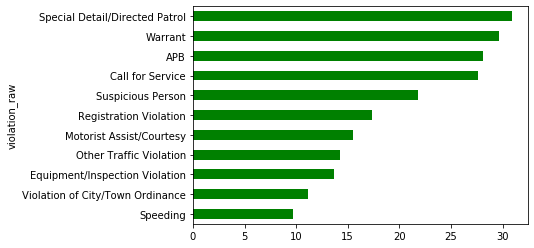

In [32]:
stop_length.sort_values().plot(kind = "barh", color = "green")
plt.show()

In [33]:
# The Speeding violation is the least stopped violation,
# while the Special Detail / Directed Patrol is the longest stopped violation.

### Plotting the temperature 

In [34]:
weather = pd.read_csv("weather.csv")

In [35]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


In [37]:
import seaborn as sns

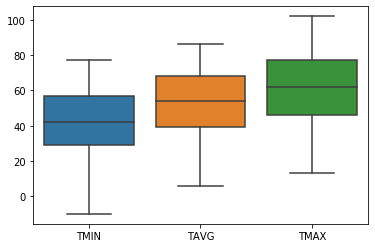

In [38]:
sns.boxplot(order=["TMIN", "TAVG", "TMAX"], data=weather)

In [39]:
# TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

### Plotting the temperature difference

In [40]:
weather["TDIFF"] = weather.TMAX - weather.TMIN

In [41]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

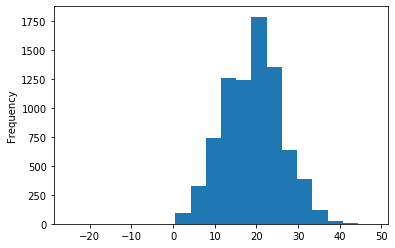

In [42]:
weather.TDIFF.plot.hist(bins = 20)
plt.show()

In [43]:
# The data seems reliable as it gives a normal distribution image.

### Counting bad weather conditions

In [44]:
WT = weather.loc[:, "WT01" : "WT22"]

In [45]:
weather["bad_conditions"] = WT.sum(axis = "columns")

In [46]:
weather["bad_conditions"] = weather.bad_conditions.fillna(0).astype('int')

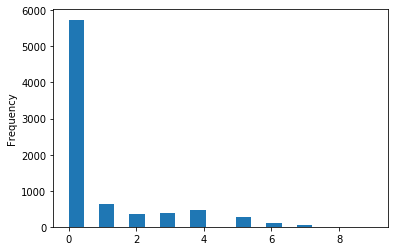

In [47]:
weather.bad_conditions.plot.hist(bins=20)
plt.show()

In [48]:
# It seems that there are no bad weather conditions in most of the days.

### Rating the weather conditions

In [49]:
weather.bad_conditions.value_counts().sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [50]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [51]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [52]:
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

### Changing the data type to category

In [53]:
cats = ["good", "bad", "worse"]

In [54]:
weather["rating"] = pd.Categorical(weather["rating"], ordered = True, categories= cats)

In [55]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

### Preparing the DataFrames

In [56]:
ri.reset_index(inplace = True)

In [57]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,8
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,23
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False,45


In [58]:
weather_rating = weather[["DATE", "rating"]]

In [59]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


### Merging the DataFrames

In [60]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on="stop_date", right_on="DATE", how="left")

In [61]:
ri_weather.shape

(95877, 27)

In [62]:
ri_weather.set_index("stop_datetime", inplace=True)

In [63]:
ri_weather.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,Citation,False,0-15 Min,False,False,Zone K1,False,8,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,Citation,False,16-30 Min,False,False,Zone X4,False,23,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,Citation,False,16-30 Min,False,False,Zone X4,False,23,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,Citation,False,0-15 Min,False,False,Zone X4,False,8,2005-01-04,good


### Comparing arrest rates by weather rating

In [64]:
ri_weather.is_arrested.mean()

0.05181638974936638

In [65]:
ri_weather.groupby("rating").is_arrested.mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [66]:
ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

In [67]:
# It was observed that the rate of arrests increased as the weather got worse

### Selecting From a mult-indexed Series

In [68]:
arrest_rate = ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

In [69]:
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

In [70]:
arrest_rate.loc["Moving violation", "bad"]

0.11629857422421024

In [71]:
arrest_rate.loc["Speeding"]

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

### Reshaping the arrest rate data

In [72]:
arrest_rate.unstack

<bound method Series.unstack of violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64>

In [73]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [74]:
# It was observed that the rate of arrests increased as the weather got worse.